# 1.BUSINESS UNDERSTANDING

"A wine manufacturing company wants to automate its quality control process to reduce manual errors and increase consistency in wine grading. They aim to develop a predictive model that classifies wines into 'high-quality' or 'low-quality' segments based on physicochemical properties, to optimize production, marketing, and pricing strategies."


1. Identify the chemical properties that influence wine quality.

2. Build a classification model to categorize wine into quality labels (e.g., low, medium, high).

3. Determine the role wine type (red/white) plays in wine quality.

4. Validate Model Assumptions and Robustness
Rigorously test and validate statistical and ML model assumptions to ensure model robustness and generalizability.

Check for linearity, multicollinearity (VIF), normality of residuals, and homoscedasticity.

Apply cross-validation and bias-variance analysis.

Tune decision tree hyperparameters (e.g., max_depth, min_samples_split) to prevent overfitting.

5. Compare model performance

# 2.DATA UNDERSTANDING

In [109]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [110]:
# Load the dataset
def load_Dataset(path):
  df = pd.read_csv(path)
  return df

# Load the dataset and display the first five columns
df = load_Dataset('Data/wine-quality-white-and-red.csv')
# df = load_Dataset('Data/winequality-red.csv')

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [111]:
# Check the number of rows and columns
df.shape

(6497, 13)

In [112]:
# Checking the ydescriptioon to understand the data more
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- The average of fixed acidity is `7.21`, the highest is `15.9`
- The average of volatile acidity is `0.34`, the highest is `1.58`
- The average of citric acid is` 0.32`, the highest is `1.66`
- The average of residual sugar is `5.44`, the highest is `65.8`
- The average of chlorides is `0.06`, the highest is `0.61`
- The average of free sulfur dioxide is `30.52`, the highest is `289`
- The average of total sulfur dioxide is `115.74`, the highest is `440`
- The average of density is `0.99`, the highest is `1.o4`
- The average of pH is `3.21`, the highest is `4.01`
- The average of sulphates is `0.53`, the highest is `2`
- The average of alcohol is `10.49`, the highest is `14.90`
- The average of quality is `5.81`, the highest value is `9`

In [113]:
# Check more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


This shows us that our dataset has no null values.

# 3.DATA PREPARATION

## 3.1 Handling Missing Values

In [114]:
# Chcek for missing values
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We do not have any missing values in this dataset

## 3.2 Encode to Binary

In [115]:
# Convert wine type to binary
df['is red'] = (df['type'] == 'red').astype(int)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


## 3.4 Adding Important Columns

In [116]:
# Add the target we will use in our multi linear Rehression
df['target'] = (df['quality'] >= 7).astype(int)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red,target
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0


Created a `target` column that will be used in our `multilinear regression` as the `dependent variabla`

In [117]:
# Add quality labels in categories
def qualityLabel(qual):
  if qual <= 4:
    return 'low'
  elif qual <= 7:
    return 'medium'
  else:
    return 'high'

df['quality label'] = df['quality'].apply(qualityLabel)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red,target,quality label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,medium


Created a new column `quality label` that classifies the quality in to `low, medium` and `high` quality

In [118]:
# Create new Features
df['sugar/acidity'] = df['residual sugar'] / (df['volatile acidity'] + 1e-5)
df['sulphates ratio'] = df['sulphates'] / (df['chlorides'] + 1e-5)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red,target,quality label,sugar/acidity,sulphates ratio
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0,medium,76.663827,9.997778
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,medium,5.333156,9.997960
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0,medium,24.641977,8.798240
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,medium,36.954915,6.895363
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,medium,36.954915,6.895363


This is to create new columns that we will be using in our modelling.

## 3.5 Explanatory Data Analysis
### 3.5.1 Understand dostribution between Wine quality and Type

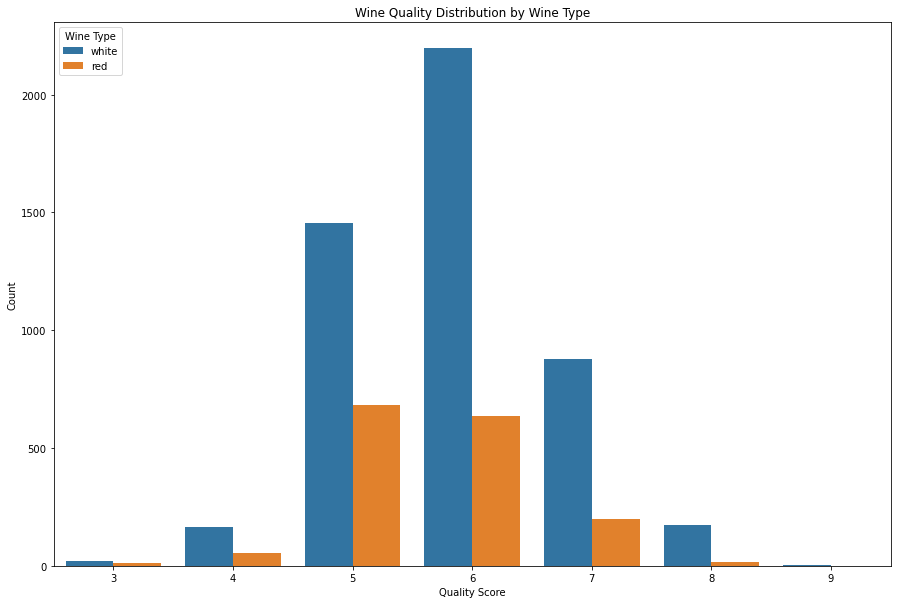

In [119]:
plt.figure(figsize=(15, 10))
sns.countplot(x='quality', hue='type', data=df)
plt.title('Wine Quality Distribution by Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.show()

- The output shows that most wines are rated 5 and 6 showning that the medium quality wines ast average dominate.This shows the dataset is imbalanced as most wines fall under the moderate category.
- Very few wines in low quality and high quality wines
- The Data is imbalanced so we will consider alternative solutions like Resampling and class weights

### 3.5.2 Correlation heatmap between the numerical features in the dataset

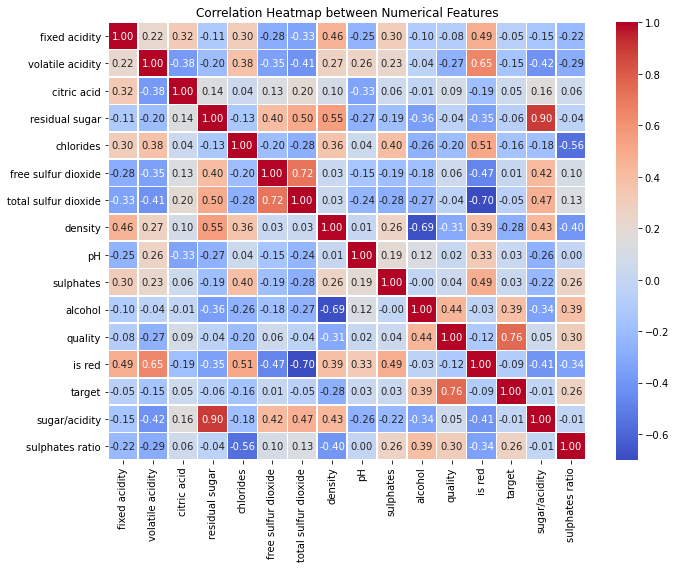

In [120]:
numericalCols = df.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(10,8))
sns.heatmap(numericalCols.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Numerical Features')
plt.tight_layout()
plt.show()

Correlation coeffficients range from `-1` to `1` where:
`+1` strong positive correlation(an increase in one leads to an increase in the other)
`-1` strong negative correlation(as one increases the other decreases)
`0` There is no correlation

Our main concern is how features relate to `quality`.

From the matrx above we conclude the features with the highest correlation to qualitya are `alcohol` with `0.44`(positive correlation) and `volatile acidity` with `-0.27` (negative correlation)

In [143]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'is red', 'target', 'quality label', 'sugar/acidity',
       'sulphates ratio', 'quality label encoded'],
      dtype='object')

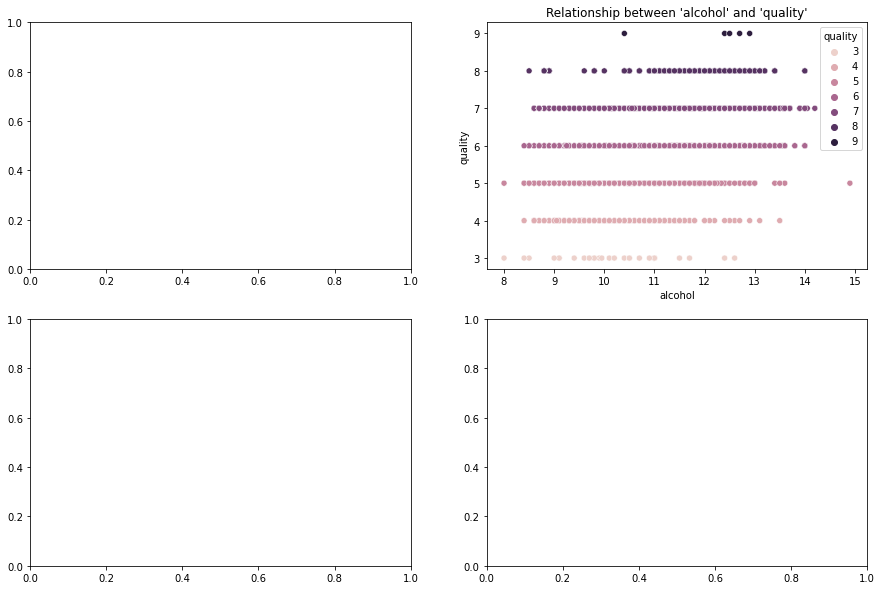

In [ ]:
## Check relationship between quality and the 4 best features we have seen from the matrix

ig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

#### Alcohol boxplot
- Higher quality wines like from 7-9 have higher alcohol content
- Lower quality wines have lower alcohol
- Quality increases with an increase in median alcohol content

# 4.MODELING

## 4.1  Regression

### 4.1.1 Multi Linear Regression

In [122]:
# Chack all the columns we have to point out which to drop
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'is red', 'target', 'quality label', 'sugar/acidity',
       'sulphates ratio'],
      dtype='object')

In [123]:
# Select the independet variables as X
X = df.drop(['target','type','quality', 'is red', 'target', 'quality label'], axis = 1)
y = df.target 

# Split the Dataset into Training and testing set(80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True,random_state = 42)

# Adding a Constant term for the Intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting model
model = sm.OLS(y_train, X_train).fit()
print(model.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     95.96
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          4.73e-231
Time:                        14:00:36   Log-Likelihood:                -2022.7
No. Observations:                5197   AIC:                             4073.
Df Residuals:                    5183   BIC:                             4165.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   32.7613 

In [124]:
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
    'sugar/acidity', 'sulphates ratio'
]

# Assume df is your full dataset
X = df[features].copy()
# Add intercept for VIF calculation
X = add_constant(X)  

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values("VIF", ascending=False)


,feature,VIF
0,const,1.880658e+06
8,density,1.756188e+01
4,residual sugar,1.443772e+01
12,sugar/acidity,8.275501e+00
1,fixed acidity,4.935929e+00
11,alcohol,4.862267e+00
13,sulphates ratio,3.496497e+00
10,sulphates,3.250037e+00
7,total sulfur dioxide,3.055190e+00
5,chlorides,2.859075e+00


In [125]:
# Select the independet variables as X
X = df.drop(['target','type','quality', 'is red', 'target', 'quality label','citric acid','residual sugar','pH', "chlorides"], axis = 1)

# Select the target variable
y = df.target 

# Split the Dataset into Training and testing set(80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True,random_state = 42)

# Adding a Constant term for the Intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting model
model = sm.OLS(y_train, X_train).fit()
print(model.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     135.3
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          7.49e-230
Time:                        14:00:37   Log-Likelihood:                -2035.2
No. Observations:                5197   AIC:                             4090.
Df Residuals:                    5187   BIC:                             4156.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   18.0766 

In [126]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred,squared = False)

print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 0.35


In [127]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 0.35


### 4.1.2 Normalizing and Standardizing important Features

In [128]:
#Normalize using Standard scaler
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']

scaler = StandardScaler()
X = df[cols]
Xscaled = scaler.fit_transform(X)

#convert the scaled array into df with otiginal columns
XscaledDf = pd.DataFrame(Xscaled, columns=cols)

Normalized the data to help improve the convergence rate during the optimization process, and also prevents features with very large variances from exerting excessive influence during model training.

### 4.1.2 Ridge and Lasso Regresion

In [129]:
# Ridge Regression
X_train, X_test, y_train, y_test = train_test_split(XscaledDf, df['target'], test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
print('Ridge RMSE:', mean_squared_error(y_test, ridge_preds, squared=False))

Ridge RMSE: 0.3518937143956756


In [130]:
# Lasso Regression
X_train, X_test, y_train, y_test = train_test_split(XscaledDf, df['target'], test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
print('Lasso RMSE:', mean_squared_error(y_test, lasso_preds, squared=False))

Lasso RMSE: 0.37673635562759683


## 4.2 Classification

### 4.2.1 Logostic Regression Model

We will use logistic regresssion to predict the quality of wine and classify it into low medium or high

#### 4.2.1.1 Model

In [131]:
# Create an encoding of the quality label (target)
df['quality label encoded'] = df['quality label'].map({'low': 0, 'medium': 1, 'high': 2})
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red,target,quality label,sugar/acidity,sulphates ratio,quality label encoded
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0,medium,76.663827,9.997778,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,medium,5.333156,9.997960,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0,medium,24.641977,8.798240,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,medium,36.954915,6.895363,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,medium,36.954915,6.895363,1


In [132]:
# Drop the irrelevan columns
cols = ['target', 'quality', 'quality label', 'quality label encoded', 'citric acid',
             'residual sugar', 'pH', 'chlorides','type','is red'  
             ]

X = df.drop(columns=cols)
y = df['quality label encoded']

In [133]:
from collections import Counter
# Stratify is important to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({1: 4842, 0: 197, 2: 158})
After SMOTE: Counter({1: 4842, 0: 4842, 2: 4842})


In [134]:
# With class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,labels=[0, 1, 2], target_names=['low', 'medium', 'high'],zero_division=0))  # Zero....avoids warnings if any class is missing

[[ 29  18   2]
 [334 485 392]
 [  0   7  33]]
              precision    recall  f1-score   support

         low       0.08      0.59      0.14        49
      medium       0.95      0.40      0.56      1211
        high       0.08      0.82      0.14        40

    accuracy                           0.42      1300
   macro avg       0.37      0.61      0.28      1300
weighted avg       0.89      0.42      0.53      1300



In [135]:
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree, target_names=['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       0.24      0.20      0.22        49
      medium       0.95      0.96      0.95      1211
        high       0.46      0.45      0.46        40

    accuracy                           0.91      1300
   macro avg       0.55      0.54      0.54      1300
weighted avg       0.91      0.91      0.91      1300



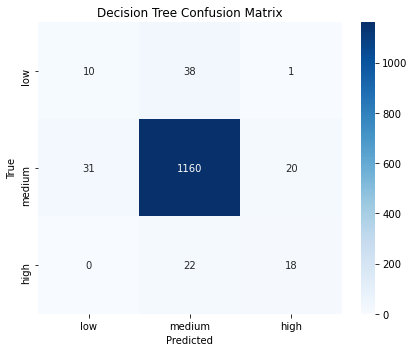

In [136]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_tree, labels=[0, 1, 2])

# Set class labels
class_names = ['low', 'medium', 'high']

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [137]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_tree.fit(X_train, y_train)
print("Best parameters:", grid_tree.best_params_)


Best parameters: {'max_depth': 3, 'min_samples_split': 2}


In [138]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Binarize labels
y_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = logreg.predict_proba(X_test)

print("Multiclass ROC AUC:", roc_auc_score(y_bin, y_score, average="macro", multi_class="ovr"))

Multiclass ROC AUC: 0.7478754629177699


In [139]:
# One curve per class
fpr = dict()
tpr = dict()
roc_auc = dict()
n = y_bin.shape[1]

for i in range(n):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

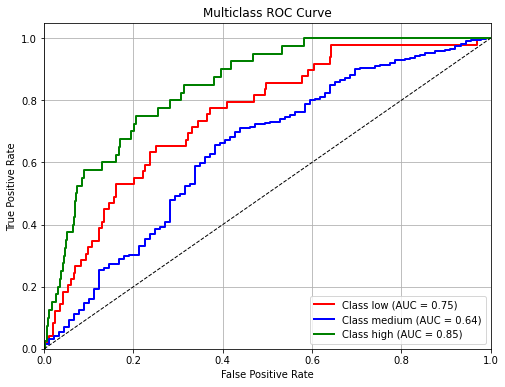

In [140]:
colors = ['red', 'blue', 'green']
labels = ['low', 'medium', 'high']

plt.figure(figsize=(8, 6))

for i in range(n):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f"Class {labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

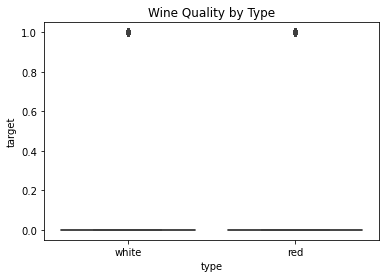

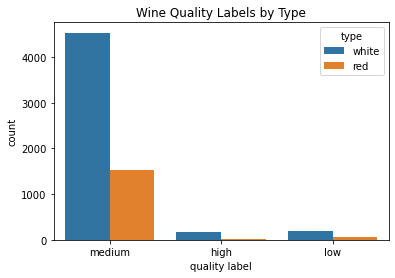

In [141]:
# Compare red vs white average target
sns.boxplot(data=df, x='type', y='target')
plt.title('Wine Quality by Type')
plt.show()

# Count of quality labels by type
sns.countplot(data=df, x='quality label', hue='type')
plt.title('Wine Quality Labels by Type')
plt.show()

# 5.EVALUATION

# 6.RECOMMENDATION

# 7.CONCLUSION